Vamos a usar la biblioteca [Networkx](https://networkx.org/), que es la biblioteca usual de
Python para trabajar con gráficas, y con [pycliques](https://github.com/rvf0068/pycliques), que es una
extensión de Networkx que estoy escribiendo para trabajar con clanes
en gráficas.



In [1]:
import networkx as nx
from pycliques.cliques import clique_graph as k
from pycliques.helly import *
from pycliques.dominated import *
from pycliques.simplicial import *
p = completely_pared_graph

#+RESULTS[501b5c2f8e342e1d770ad5fa042083f927ce9350]:

# Out[14]:

En Networkx podemos obtener gráficas aleatorias.



#+RESULTS[5c90b29b61c64bb9c47fe6f51995604d06e326be]:

# Out[4]:

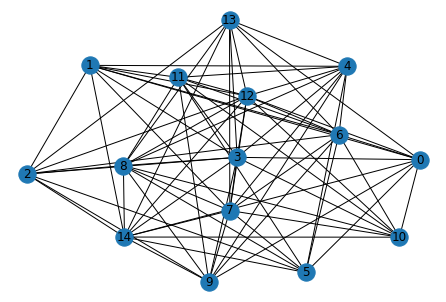

In [1]:
g = nx.gnp_random_graph(15, 0.7)
nx.draw(g, with_labels=True)

Decimos que una colección <img src="ltximg/latexAizDf8_5af22ea0dbd3aa85df399d2832b318b85a9c4b89.png" alt="$\mathcal{C}=\{X_{i}\}$" /> de subconjuntos de un conjunto
<img src="ltximg/latexRaiHfI_222eb1b8c2959d4b2b233f120e4b16ea052ad2c2.png" alt="$X$" /> es **intersecante** si para todos <img src="ltximg/latexvjli60_3fbafff00a79ad070f7efdc28fc2eb4ff7ab7e21.png" alt="$i\ne i'$" /> se tiene que
<img src="ltximg/latexQAR5NU_3e06d88b96a5f56928289b137c20f9487c0cde36.png" alt="$X_{i}\cap X_{i'}\ne\emptyset$" />. Decimos que la colección
<img src="ltximg/latex9nEzde_ea2940265343971d01cefcfab7b7b9001c3eaaf9.png" alt="$\mathcal{C}$" /> tiene la **propiedad de Helly** si toda subcolección
intersecante <img src="ltximg/latexqL9GeY_886676ff21b623ab2be1a101bc16b7aef4a4f5df.png" alt="$\mathcal{C}'\subseteq \mathcal{C}$" /> es tal que existe
<img src="ltximg/latexktnT2j_8c773ab80801e1def9d35f84051ce6729846d090.png" alt="$x\in X$" /> con <img src="ltximg/latex9SEBmh_f512e4bea21049d03ea7dbe180b409d0d2fcff9c.png" alt="$x\in X_{j}$" /> para todo <img src="ltximg/latexkXuYPF_0dbe5dfe7a21d26a9340fbe1af01a92dd0ae8a1a.png" alt="$X_{j}\in
\mathcal{C}'$" />. Decimos que una gráfica <img src="ltximg/latexVt2X5B_9edb38be0b0ac7b48c067b713f5d621de8aacb49.png" alt="$G$" /> es **clan Helly** si la
colección de sus clanes tiene la propiedad de Helly.



In [1]:
is_clique_helly(g)

#+RESULTS[84a318cf691da1915197d9f0a6625ff3fdc4debc]:

# Out[5]:
False

Una gráfica es **hereditariamente clan Helly** si todas sus subgráficas
inducidas son Helly.



In [1]:
is_hereditary_clique_helly(g)

#+RESULTS[f050e4c99555e800266e0e60a3ac86c05b3bf51e]:

# Out[6]:
False

-   Un vértice <img src="ltximg/latexI5ckq6_0ae3ebed397d95c664572f80db8bf198293f9ad0.png" alt="$x$" /> en <img src="ltximg/latexCf77Pa_9edb38be0b0ac7b48c067b713f5d621de8aacb49.png" alt="$G$" /> es *dominado* si existe <img src="ltximg/latex9xvkrP_814b04ff1934b7e71b9f6b6f513beca30edec35b.png" alt="$y\in V(G)$" />,
    <img src="ltximg/latexcM6qJQ_0383ffb6702f5d79ba629e68a655ec40f47ef70c.png" alt="$y\ne x$" /> tal que <img src="ltximg/latexdc8VEe_3e086fb93debb007170c1ed6d354cfc4b2b47572.png" alt="$z\sim x$" /> implica <img src="ltximg/latexL9LqG9_09fff822d7a1f20f50ddb946d9540488681647dd.png" alt="$z\sim y$" />.
-   (Prisner, 1992) Si <img src="ltximg/latexIY2EuC_33755cff4a8609ebcd26889f53a03212425062e0.png" alt="$x\in V(G)$" /> es dominado, <img src="ltximg/latex38TBxJ_f732570f6452f062499dc65e35117dacea5eefc7.png" alt="$G-x\simeq G$" />.
-   La gráfica **podada** es la gráfica <img src="ltximg/latex03AaIf_14080d55e30c81ad096b27d351b831c31c748944.png" alt="$P(G)$" /> que resulta de <img src="ltximg/latexK0tFEg_9edb38be0b0ac7b48c067b713f5d621de8aacb49.png" alt="$G$" />
    eliminando sucesivamente todos los vértices dominados.



In [1]:
pg = p(g)
pg.order(), pg.size()

#+RESULTS[12946e122b92d2cc6f9eb5278f2829bc2bd05ddb]:

# Out[11]:
(8, 21)

#+RESULTS[7195ed295ea02a68a545201014be43c8636a56bf]:

# Out[10]:

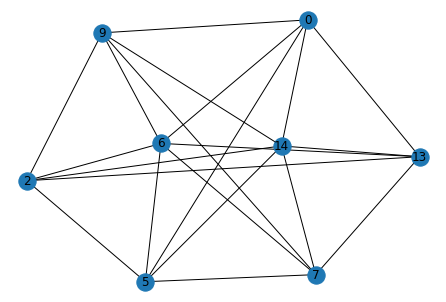

In [1]:
nx.draw(pg, with_labels=True)

In [1]:
epg = complete_s_collapse_edges(pg)
epg.order(), epg.size()

#+RESULTS[dc6f4891838dfe0666ead6a6af156c2edcfc2e28]:

# Out[12]:
(8, 21)

In [1]:
vpg = complete_s_collapse(pg)
vpg.order(), vpg.size()

#+RESULTS[d5fcbd9140a576c3d0ea7b528f8fd37834503ffa]:

# Out[13]:
(8, 21)

In [1]:
ccg = clique_complex(pg)
ccg.dong_matching()

#+RESULTS[18adb2a3982fc5f2155e6f91e095ac7f7a5a5fa8]:

# Out[15]:
#+BEGIN_EXAMPLE
  {frozenset({2, 13, 14}),
  frozenset({2, 9, 14}),
  frozenset({7, 13, 14}),
  frozenset({7, 9, 14})}
#+END_EXAMPLE